# Lead Scoring Case Study

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

### Importing and Inspecting dataset

In [2]:
#Importing dataset and having a quick view
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking .info to get basic info about the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#checking .describe to check numerical columns
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
#checking shape of the data frame
leads.shape

(9240, 37)

### Cleaning dataset

In [6]:
#On inspecting above data, we found that there are multiple columns having values 'Select' which are equivalent to missing values.
leads.replace(['Select','select'],np.NaN, inplace=True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# As from above inspection, we can say there are missing values, so checking null/missing values
null_perc = round(leads.isna().sum()/len(leads)*100,2)
null_perc = null_perc[null_perc != 0]
null_perc = null_perc.sort_values()
null_perc

Lead Source                                       0.39
Last Activity                                     1.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Specialization                                   36.58
City                                             39.71
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Profile Score                       45.65
Lead Quality                                     51.59
Lead Profile                                     74.19
How did you hear about X Education               78.46
dtype: float64

From the above insight, we can see there are alot of missing values in some columns, hence dropping those columns which have missing vvalue percentage greater than 35% as these columns will not contribute much.

In [8]:
columns_to_be_dropped = null_perc[null_perc > 35].index.to_list()
columns_to_be_dropped

['Tags',
 'Specialization',
 'City',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Profile Score',
 'Lead Quality',
 'Lead Profile',
 'How did you hear about X Education']

In [9]:
leads.drop(columns = columns_to_be_dropped , axis='column', inplace=True)

In [10]:
#checking missing values again
null_perc = round(leads.isna().sum()/len(leads)*100,2)
null_perc = null_perc[null_perc != 0]
null_perc = null_perc.sort_values()
null_perc

Lead Source                                       0.39
Last Activity                                     1.11
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
dtype: float64

In [11]:
# checking duplicacy
leads.duplicated().sum()

0

In [12]:
#checking unique values in columns
unique = leads.nunique()
unique

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [13]:
#Columns with 1 unique values and columns with every value as unique are irrelevant for model building, hence dropping these and analysing other columns
columns_to_be_dropped = unique[(unique==1) | (unique==len(leads))].index.to_list()
columns_to_be_dropped

['Prospect ID',
 'Lead Number',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [14]:
leads.drop(columns = columns_to_be_dropped , axis='column', inplace=True)

In [15]:
unique = leads.nunique()
unique

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
A free copy of Mastering The

In [16]:
#Analysing null/missing values again
null_perc = leads.isna().sum()
null_perc = null_perc[null_perc != 0]
null_perc = null_perc.sort_values()
null_perc

Lead Source                                        36
Last Activity                                     103
TotalVisits                                       137
Page Views Per Visit                              137
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
dtype: int64

In [17]:
#checking if any row have missing values more than 70%
leads[leads.isna().sum(axis=1)>(70*23/100)]

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity


This shows no row have missing values more than 70%

### Missing Value Treatment

In [18]:
# What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

As we can see distribution for 'What matters most to you in choosing a course' is highly skewed and replacing missing values with mode doesn't seems correct, hence removing these rows with missing values.

In [19]:
leads = leads[~leads['What matters most to you in choosing a course'].isna()]

In [20]:
#Analysing null/missing values again
null_perc = leads.isna().sum()
null_perc = null_perc[null_perc != 0]
null_perc = null_perc.sort_values()
null_perc

Lead Source               36
Last Activity            103
TotalVisits              130
Page Views Per Visit     130
Country                 1605
dtype: int64

In [21]:
leads['Country'].value_counts()

Country
India                   4725
United States             46
United Arab Emirates      39
Singapore                 18
Saudi Arabia              16
United Kingdom            11
Qatar                      9
Australia                  8
Hong Kong                  6
Oman                       5
Bahrain                    5
France                     5
Nigeria                    3
South Africa               3
Kuwait                     3
Philippines                2
Uganda                     2
Germany                    2
Netherlands                2
Sweden                     2
Canada                     2
Russia                     1
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Italy                      1
Denmark                    1
Ghana                      1
Vietnam                    1
Indonesia                  1
China                      1
Bangladesh                 1
Name: count, dtype: int64

As we can see, data for countries column is highly skewed and maximum frequency is for India. Also we can not drop column as it seems important column. Additionaly, we can't drop more much rows, hence categorising the country column

In [22]:
leads['Country'].fillna('Unknown', inplace=True)

In [23]:
def categorising_countries(country):
    if country == 'India':
        return 'India'
    elif country == 'Unknown':
        return 'Unknown'
    else:
        return 'Not India'

In [24]:
leads['Country'] = leads.apply(lambda country:categorising_countries(country['Country']), axis = 1)

In [25]:
leads['Country'].value_counts()

Country
India        4725
Unknown      1605
Not India     201
Name: count, dtype: int64

In [26]:
null_perc = leads.isna().sum()
null_perc = null_perc[null_perc != 0]
null_perc = null_perc.sort_values()
null_perc

Lead Source              36
Last Activity           103
TotalVisits             130
Page Views Per Visit    130
dtype: int64

In [27]:
#Dropping all other rows having null values
leads=leads.dropna()

In [28]:
null_perc = leads.isna().sum()
null_perc = null_perc[null_perc != 0]
null_perc = null_perc.sort_values()
null_perc

Series([], dtype: int64)

Null percentage is 0 now

In [29]:
leads.shape

(6372, 20)

In [30]:
len(leads)/9240*100

68.96103896103895

After cleaning and imputing missing values, we still have approx 69% of data

### Outlier Analysis

In [31]:
leads.describe(include='all')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
count,6372,6372,6372,6372,6372.000000,6372.000000,6372.000000,6372.000000,6372,6372,6372,6372,6372,6372,6372,6372,6372,6372,6372,6372
unique,4,16,2,2,NaN,NaN,NaN,NaN,16,3,6,3,2,2,1,2,2,2,2,14
top,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
freq,3624,2048,5938,6370,NaN,NaN,NaN,NaN,2455,4724,5475,6370,6362,6371,6372,6371,6369,6366,4201,2038
mean,NaN,NaN,NaN,NaN,0.481011,3.606717,535.279190,2.479565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.499678,4.852274,565.402288,2.166345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,34.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,3.000000,287.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,5.000000,1022.250000,3.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


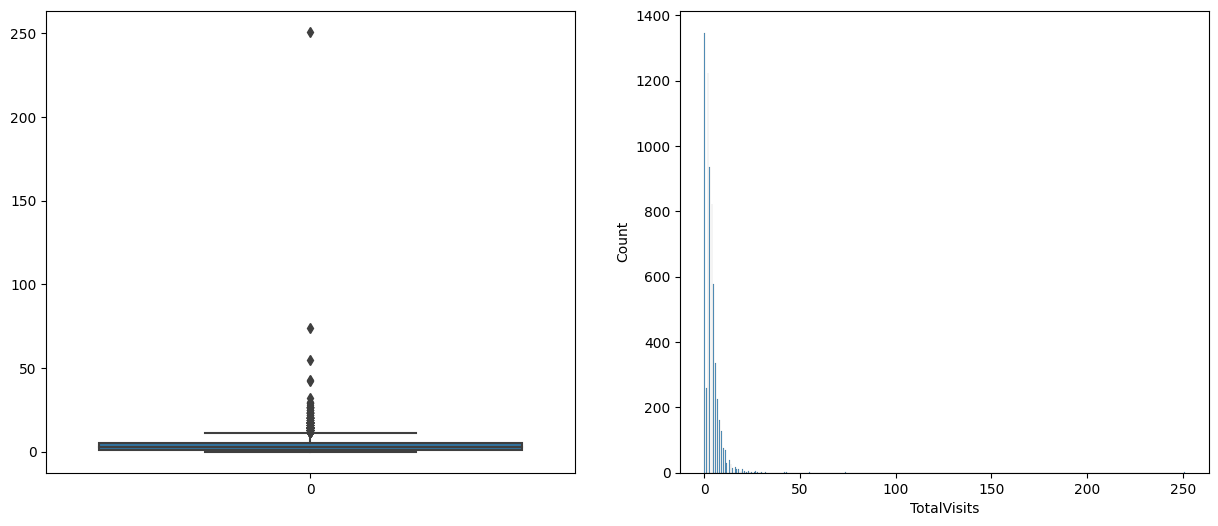

In [32]:
#TotalVisits
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(leads['TotalVisits'])
plt.subplot(1,2,2)
sns.histplot(leads['TotalVisits'])
plt.show()

In [33]:
leads['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.95,.99,.999])

count    6372.000000
mean        3.606717
std         4.852274
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        17.290000
99.9%      29.629000
max       251.000000
Name: TotalVisits, dtype: float64

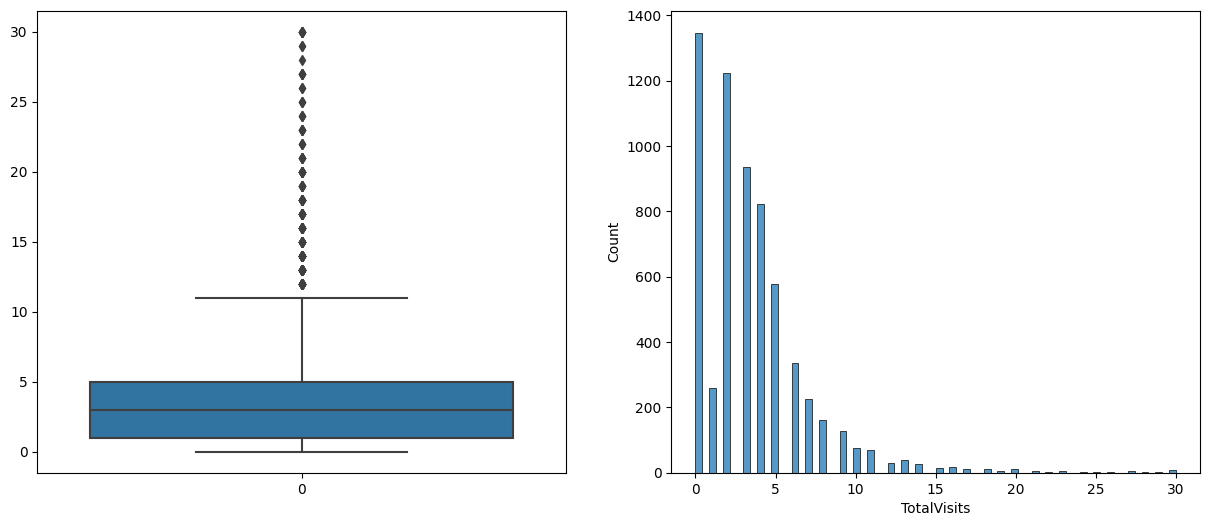

In [34]:
#From the above two analysis, we can there are definitely outliers in TotalVisits columns, hence capping these values to 30
leads['TotalVisits']=leads['TotalVisits'].apply(lambda x: 30 if x > 30 else x)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(leads['TotalVisits'])
plt.subplot(1,2,2)
sns.histplot(leads['TotalVisits'])
plt.show()

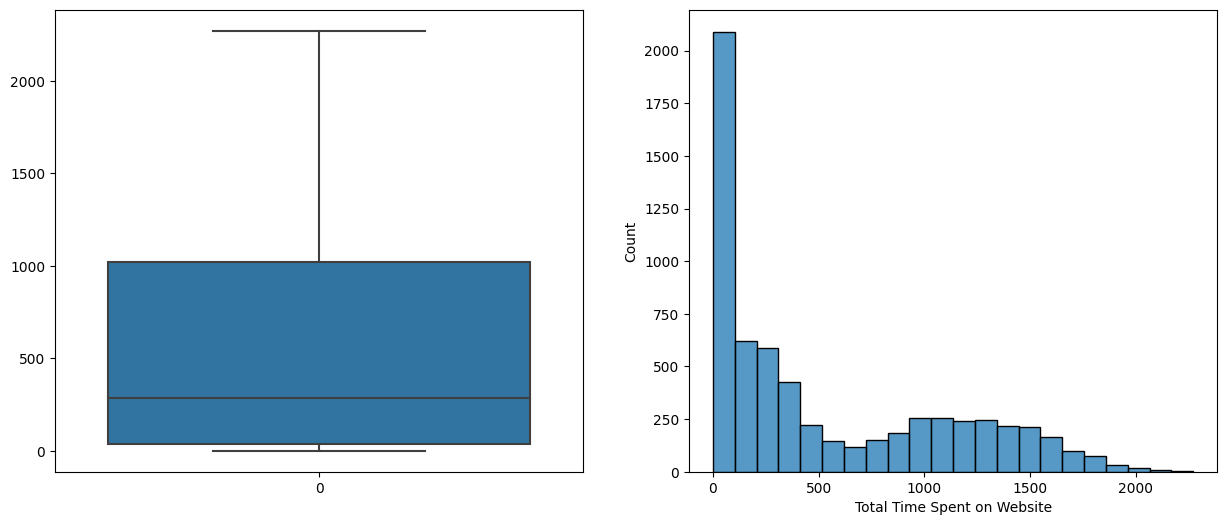

In [35]:
#Total Time Spent on Website
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(leads['Total Time Spent on Website'])
plt.subplot(1,2,2)
sns.histplot(leads['Total Time Spent on Website'])
plt.show()

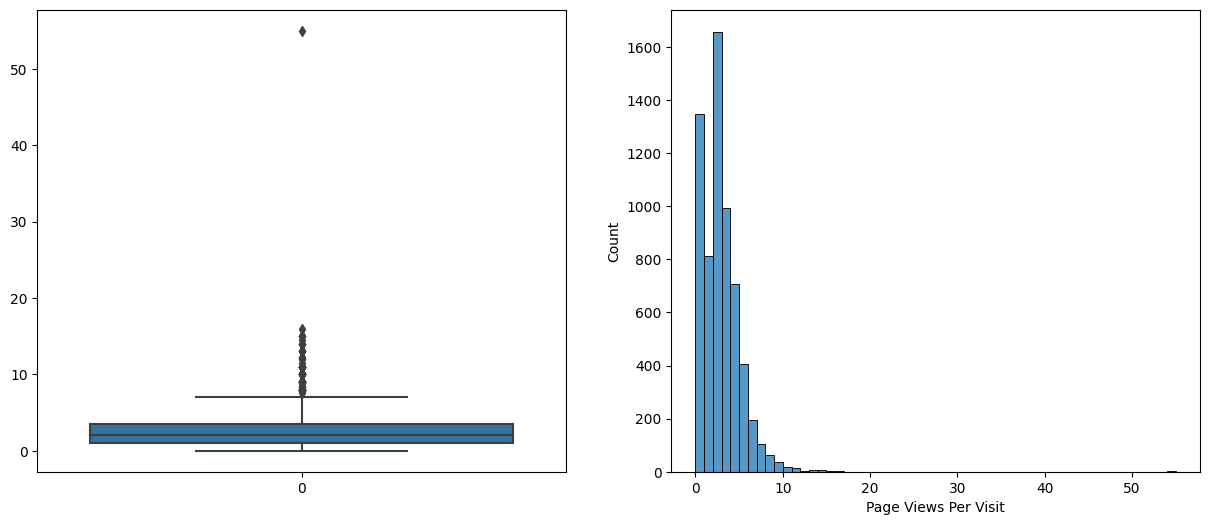

In [36]:
#Page Views Per Visit
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(leads['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.histplot(leads['Page Views Per Visit'],binwidth=1)
plt.show()

In [37]:
leads['Page Views Per Visit'].describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.95,.99,.999])

count    6372.000000
mean        2.479565
std         2.166345
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.500000
90%         5.000000
95%         6.000000
99%         9.000000
99.9%      14.314500
max        55.000000
Name: Page Views Per Visit, dtype: float64

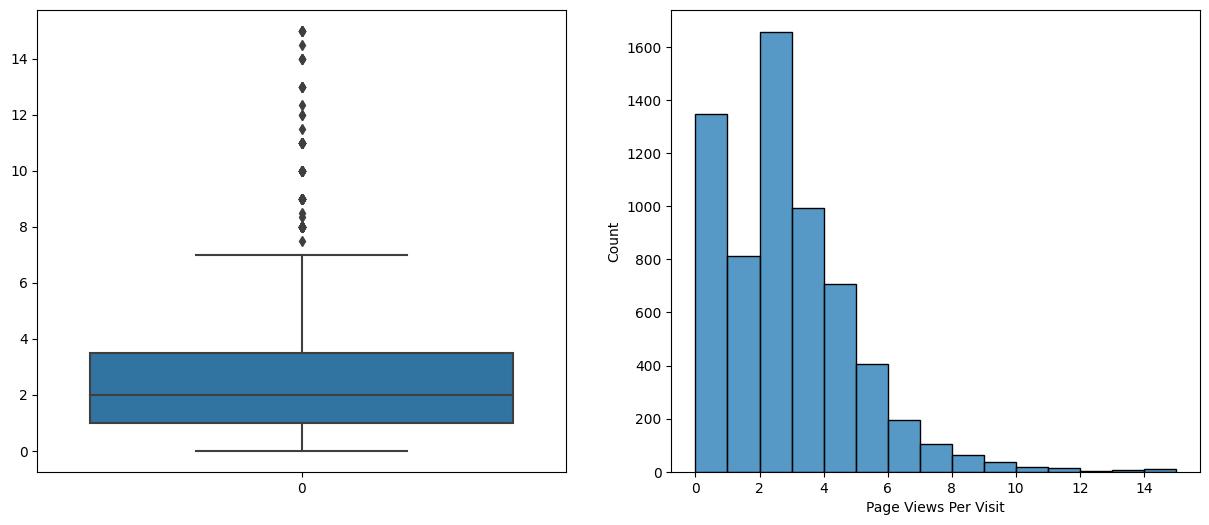

In [38]:
#From the above two analysis, we can there are outliers in Page Views Per Visit columns, hence capping these values to 15
leads['Page Views Per Visit']=leads['Page Views Per Visit'].apply(lambda x: 15 if x > 15 else x)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(leads['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.histplot(leads['Page Views Per Visit'],binwidth=1)
plt.show()

### Univariate Analysis

In [39]:
def cat_col(column):
    sns.countplot(data = leads, x= column).tick_params(axis='x', rotation = 90)
    plt.title(column)
    plt.show()
def num_col(column):
    sns.histplot(leads[column])
    plt.title(column)
    plt.show()

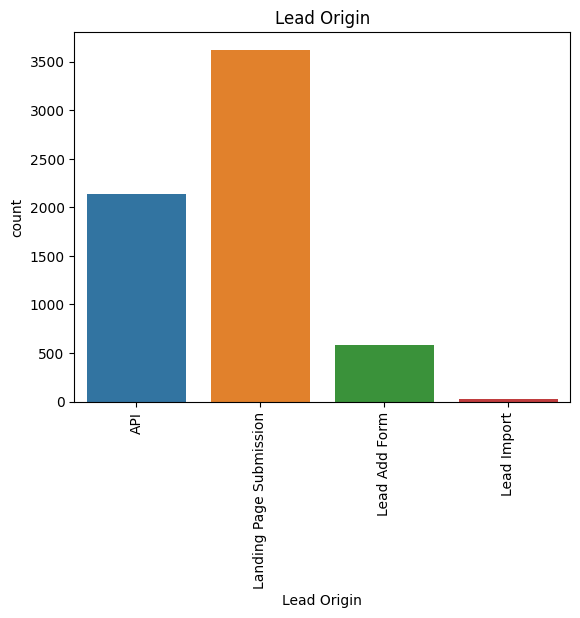

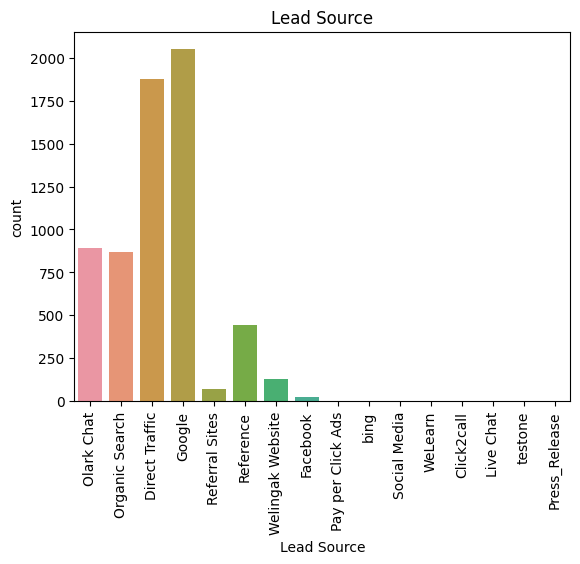

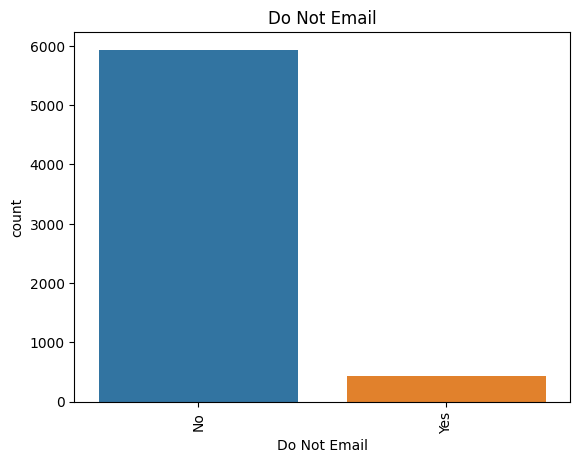

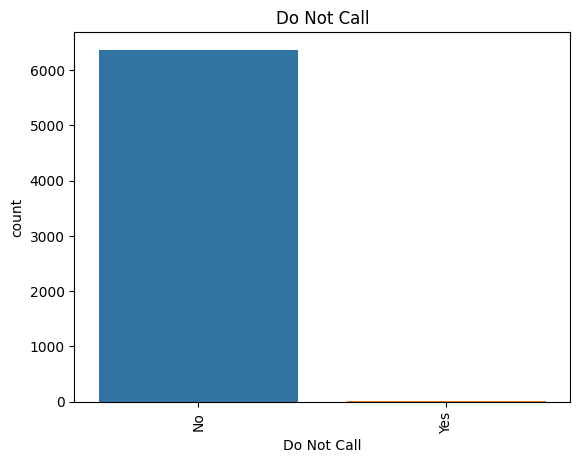

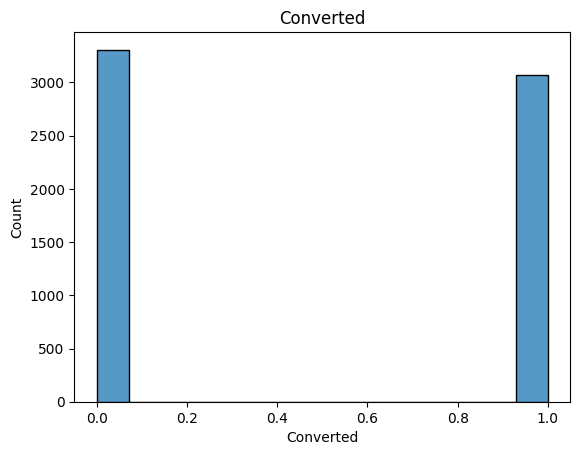

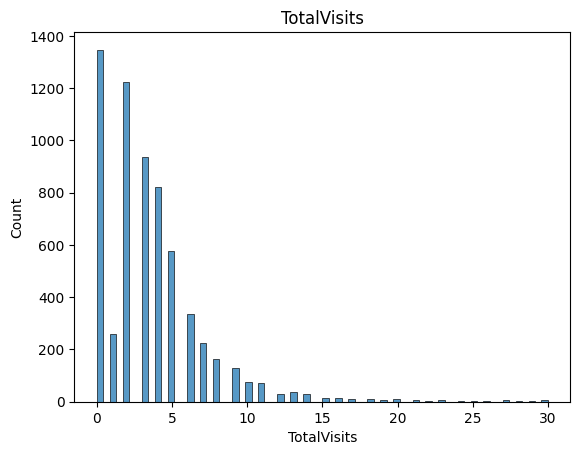

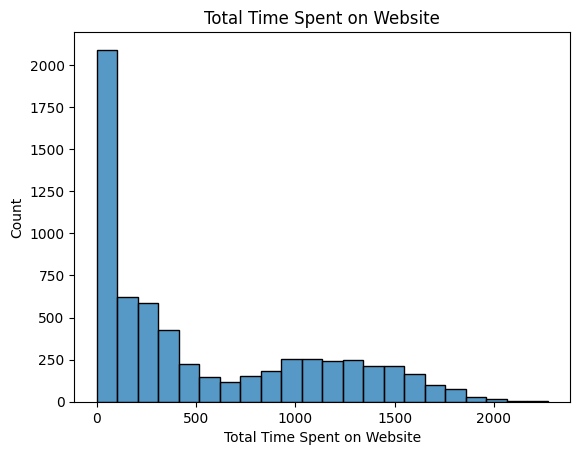

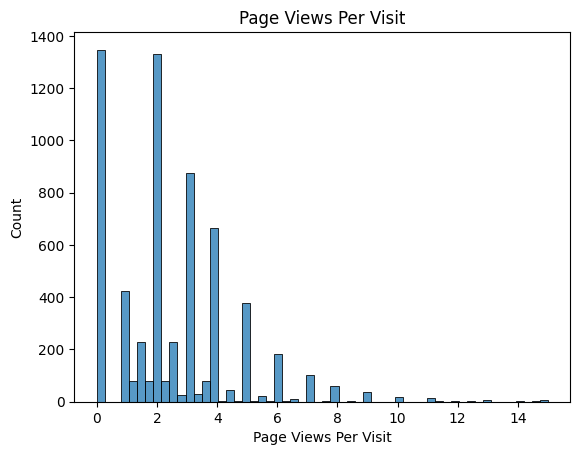

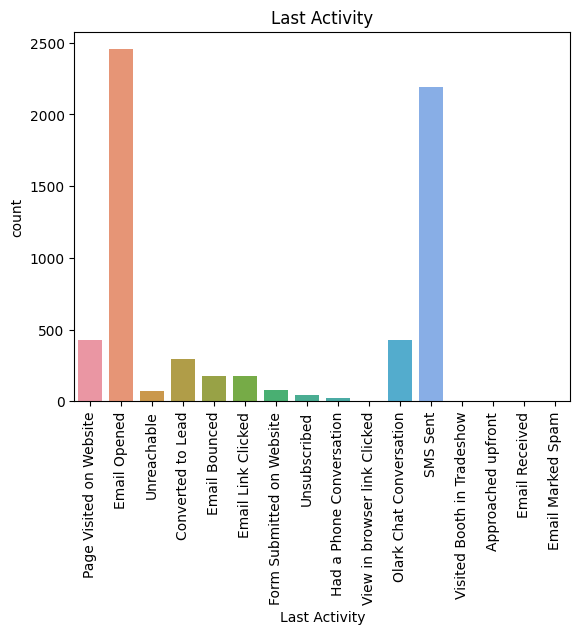

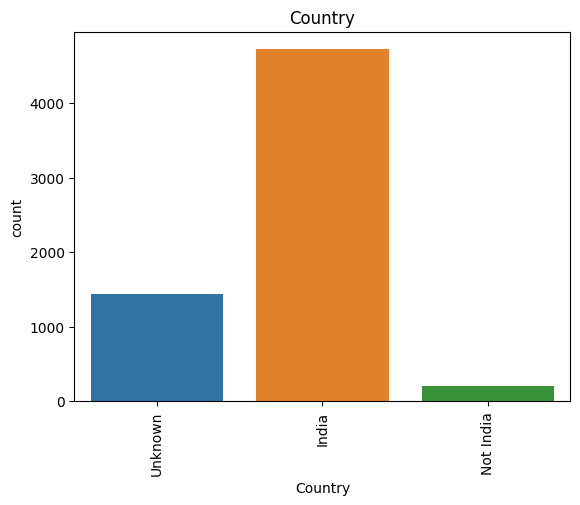

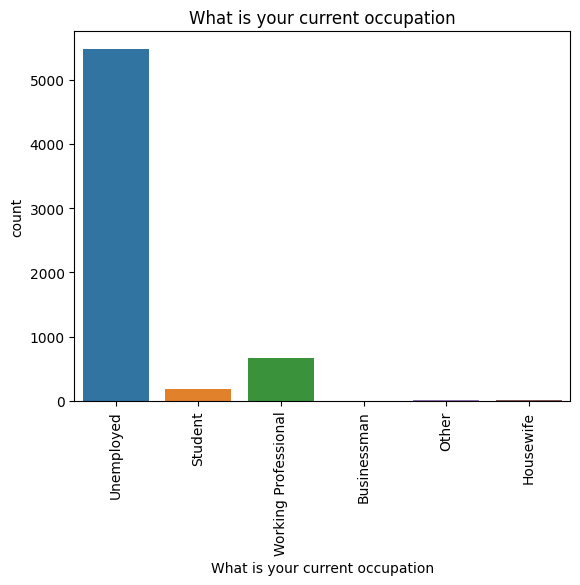

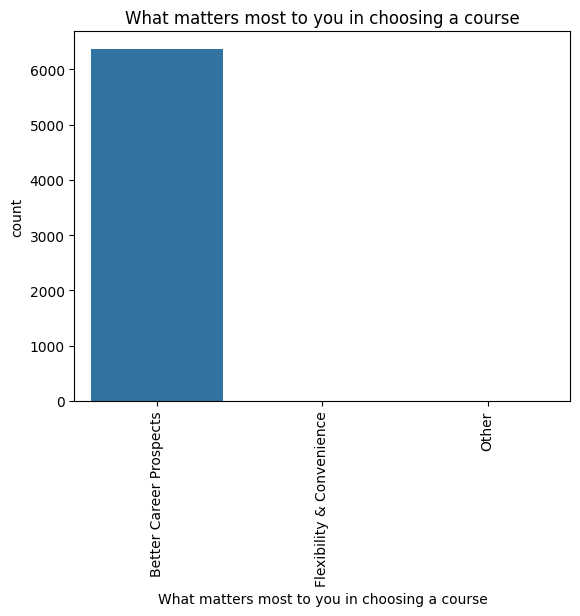

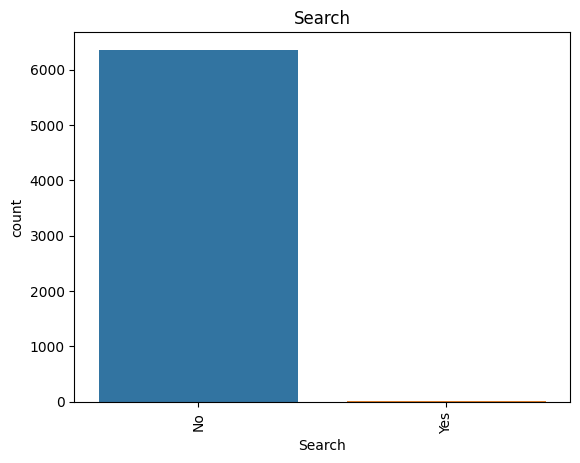

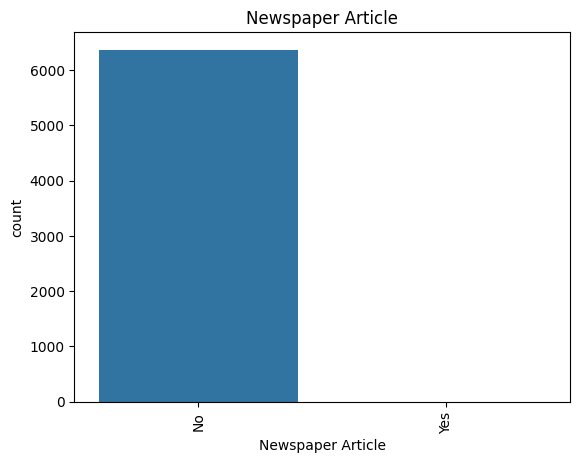

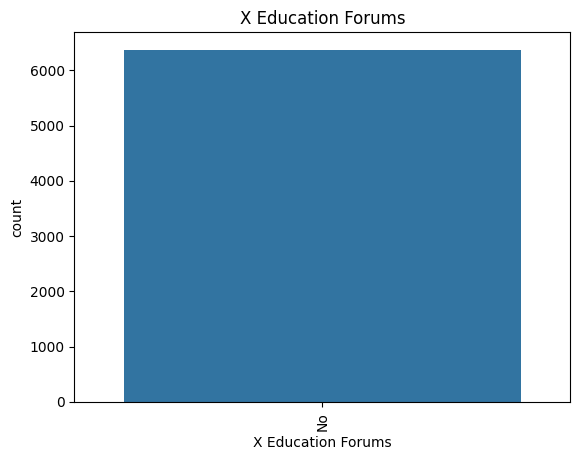

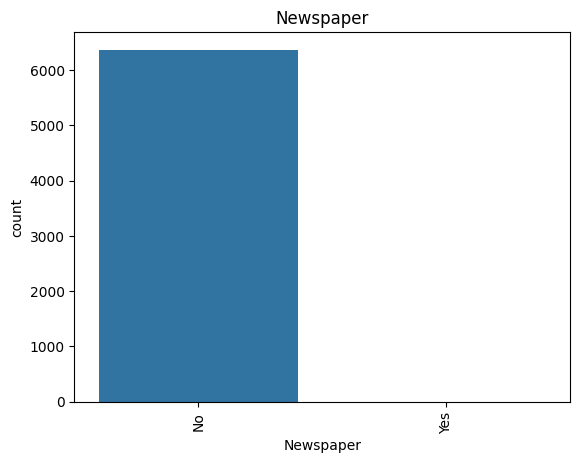

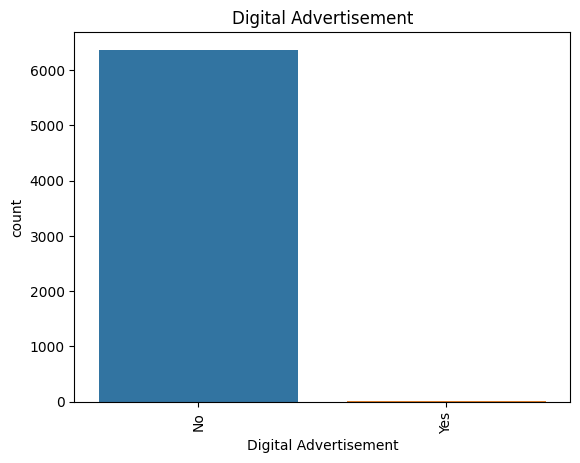

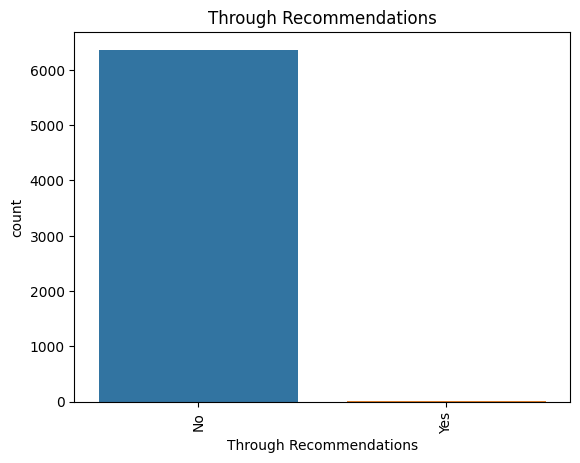

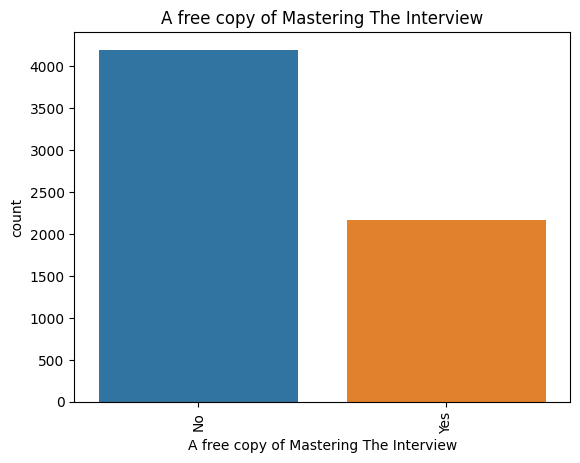

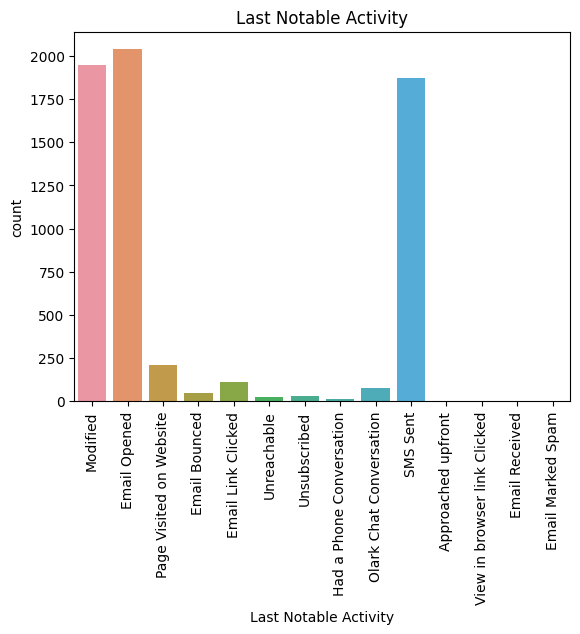

In [40]:
for col in leads.columns:
    dataType = leads.dtypes[col]
    if dataType == np.object:
        cat_col(col)
    elif dataType == np.int64 or dataType == np.float64:
        num_col(col)

From the above plots, we can see there are many columns which are highly skewed, hence these columns are to be dropped.

In [41]:
columns_to_be_dropped = ['Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article',
                            'Search', 'What matters most to you in choosing a course', 'Do Not Call', 'Do Not Email']

In [42]:
leads.drop(columns = columns_to_be_dropped , axis='column', inplace=True)

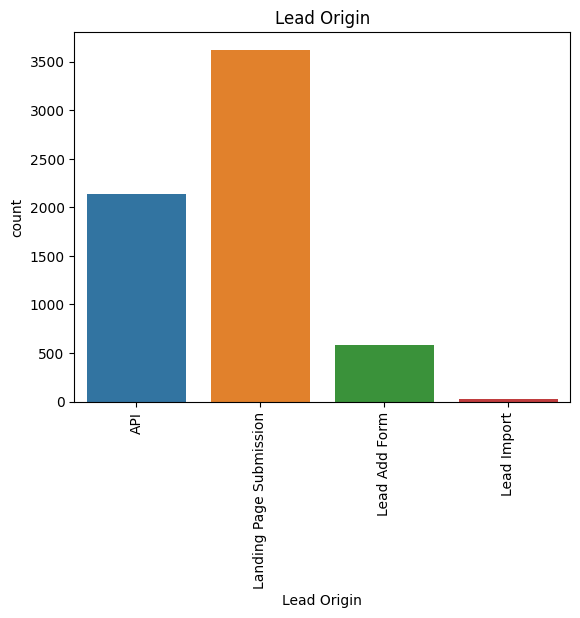

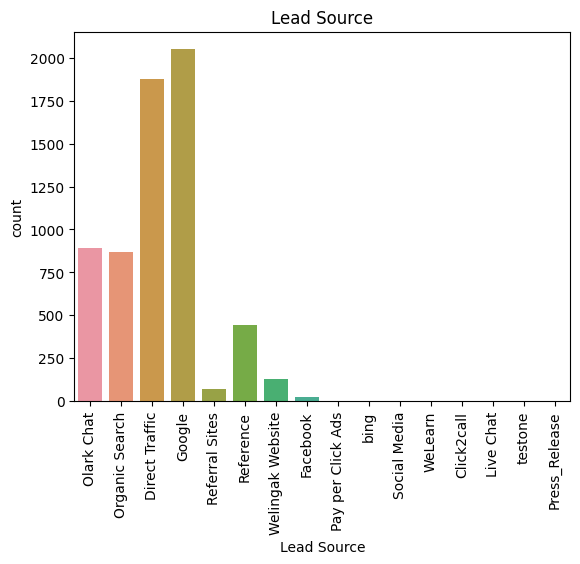

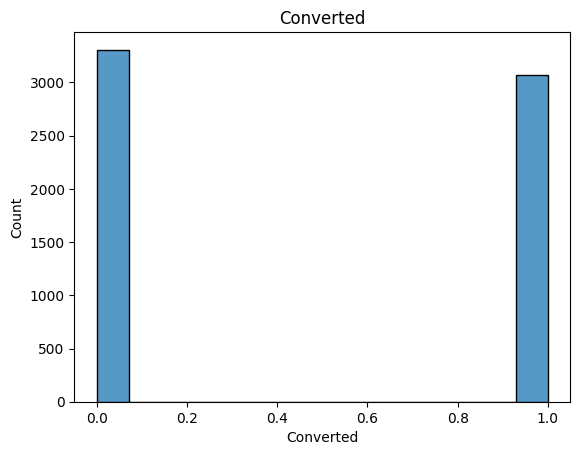

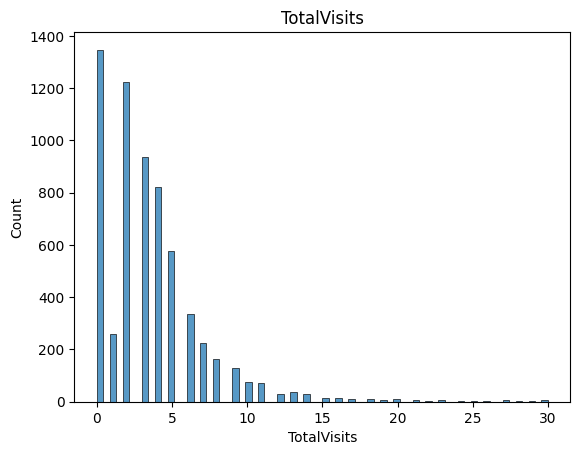

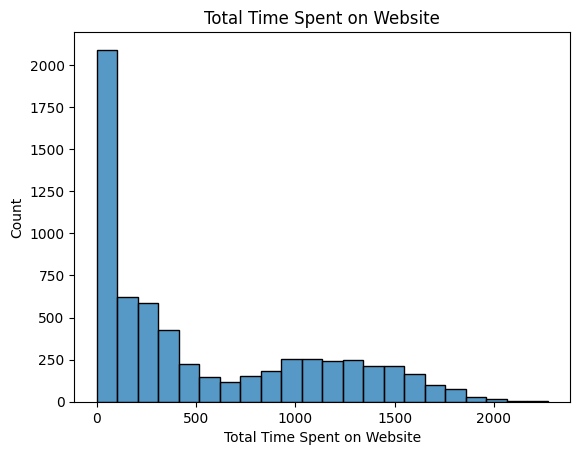

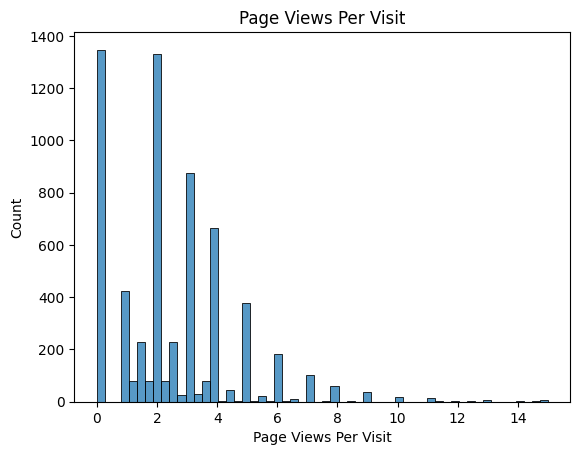

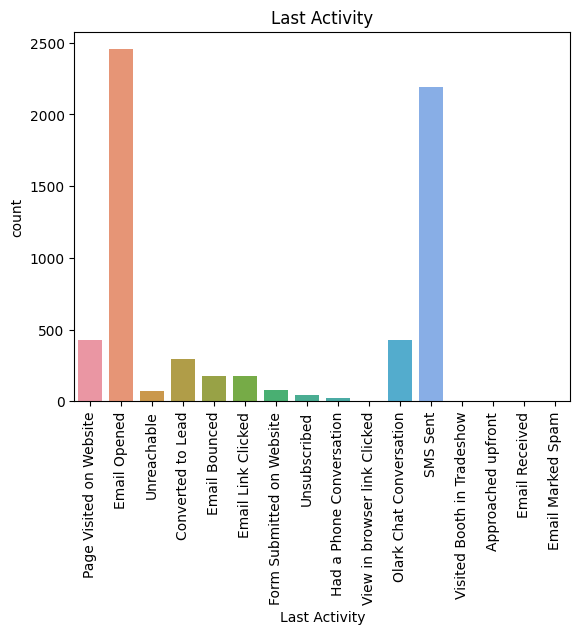

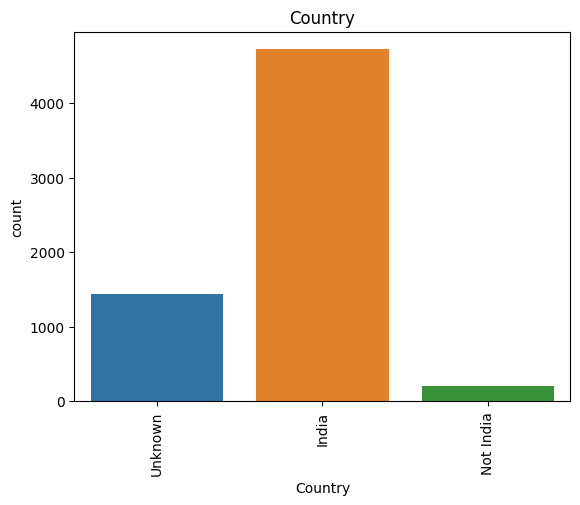

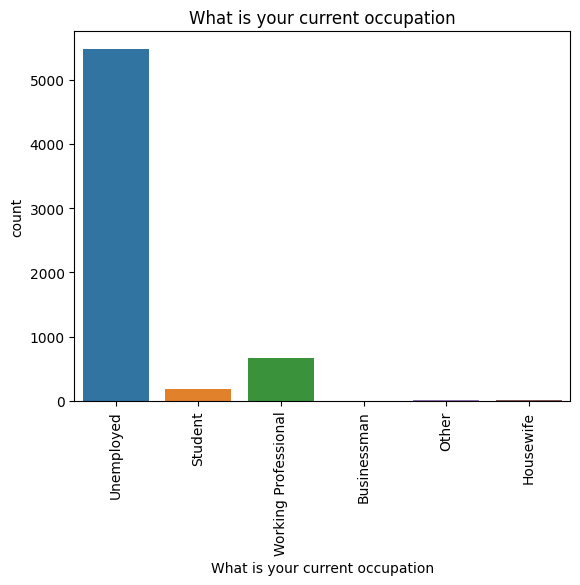

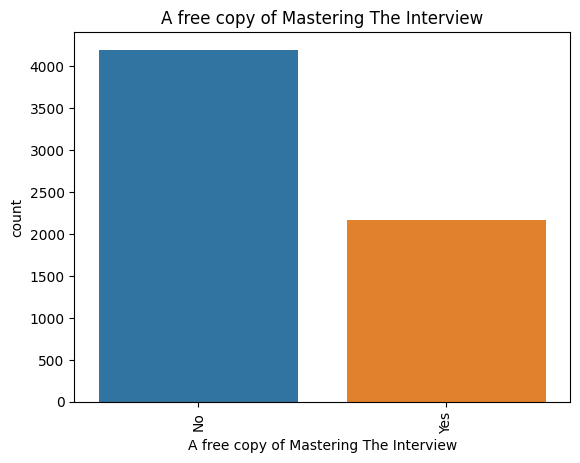

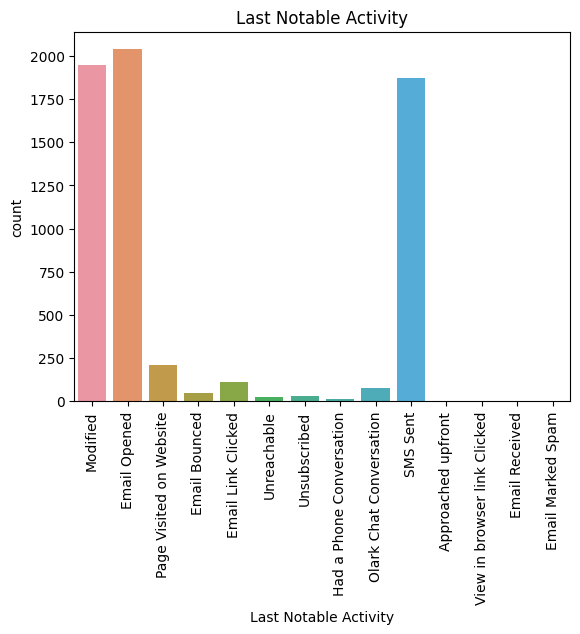

In [43]:
#Analysing columns again
for col in leads.columns:
    dataType = leads.dtypes[col]
    if dataType == np.object:
        cat_col(col)
    elif dataType == np.int64 or dataType == np.float64:
        num_col(col)

### Bivariate Analysis
### Relationship between categorical columns with the converted column

In [44]:
def cat_col_bi(column):
    sns.countplot(x=column, hue='Converted', data= leads).tick_params(axis='x', rotation = 90)
    plt.title(f'Distribution of {column} with respect to Converted')
    plt.show()

In [45]:
def num_col_bi(column):
    sns.histplot(x=column,hue='Converted', data=leads,multiple='dodge')
    plt.title(f'Distribution of {column} with respect to Converted')
    plt.show()

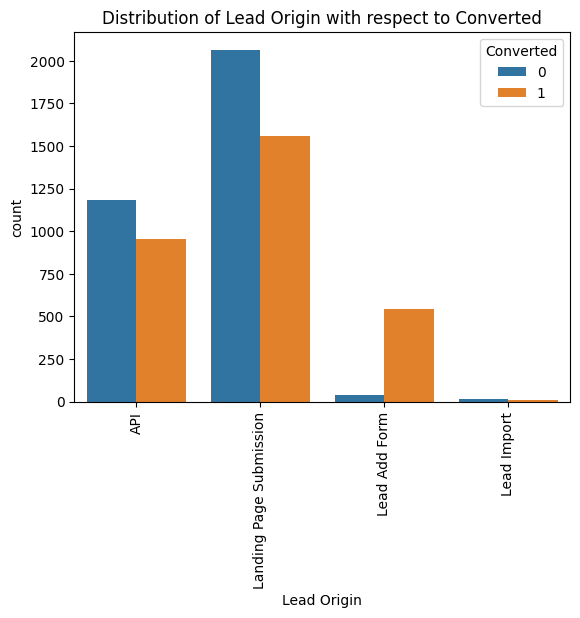

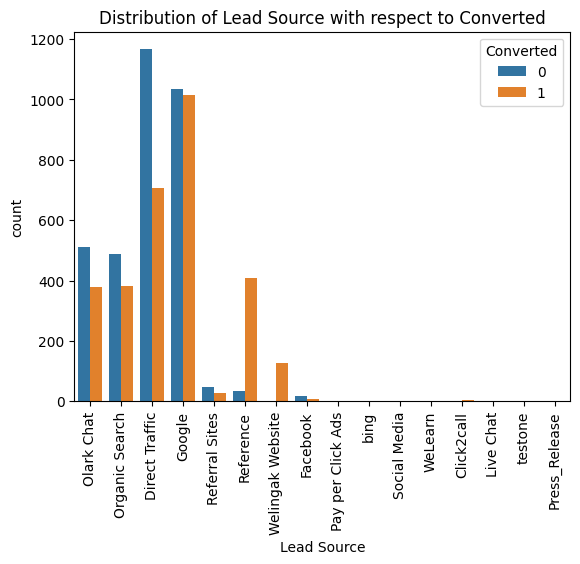

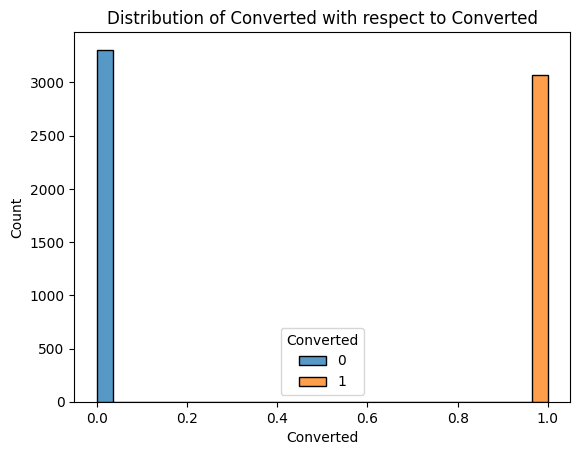

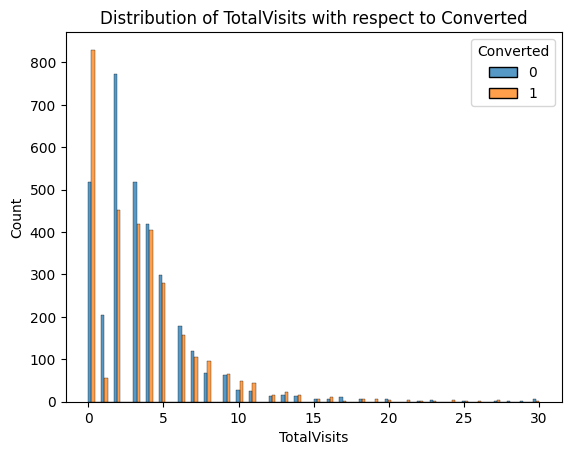

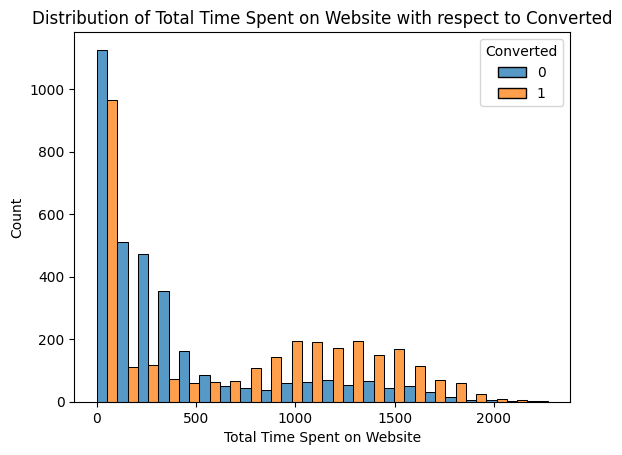

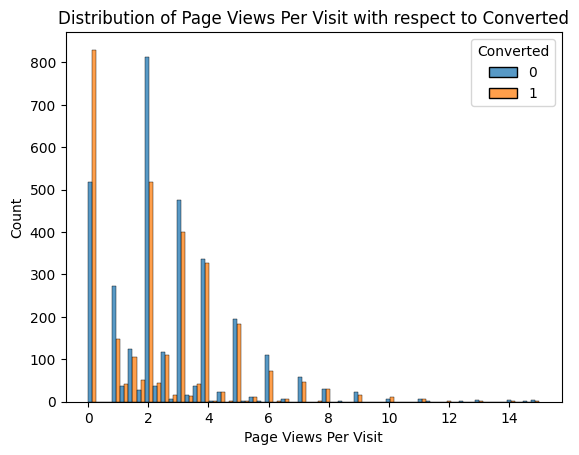

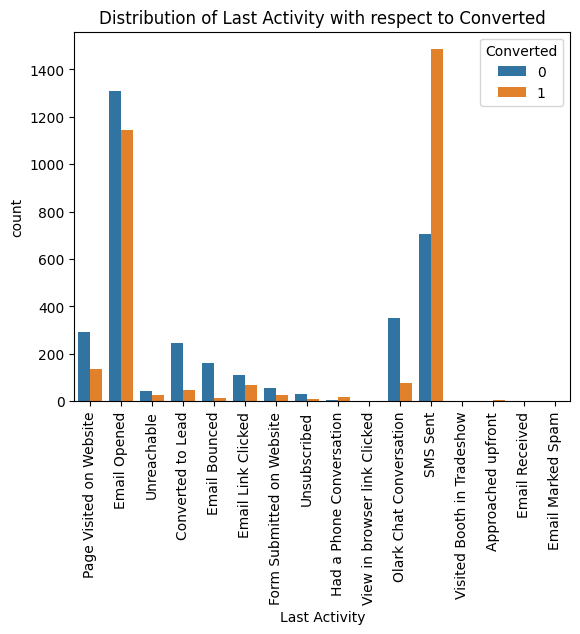

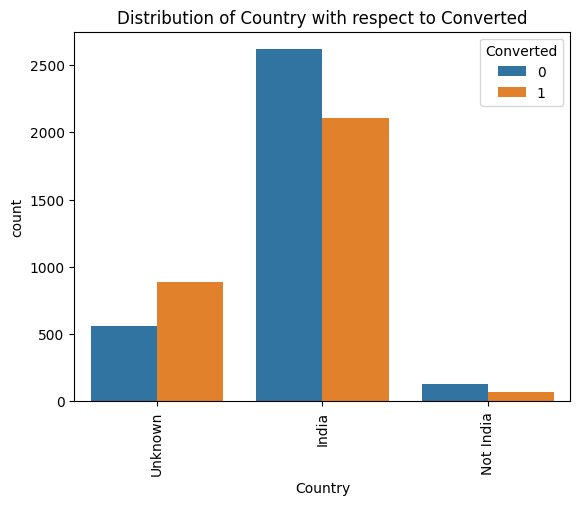

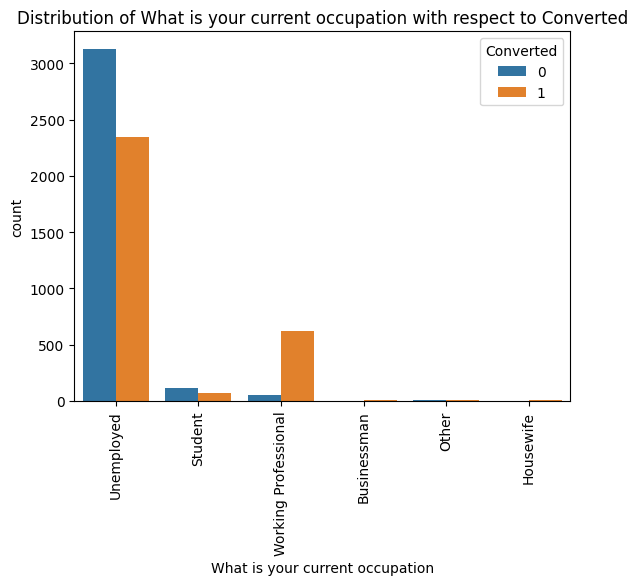

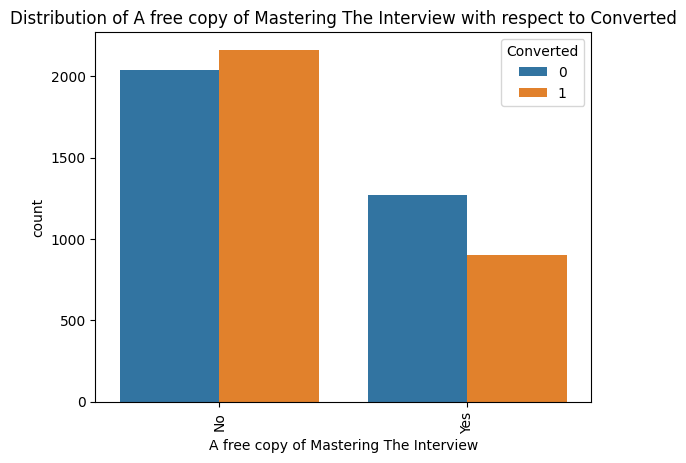

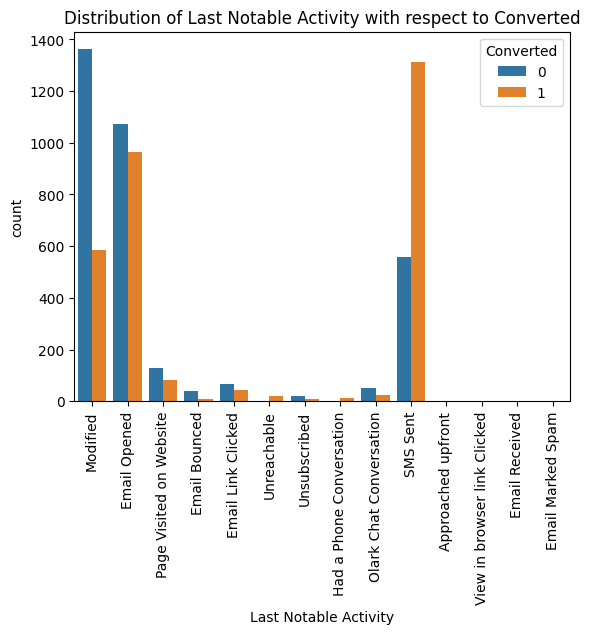

In [46]:
columns = leads.columns.to_list()
columns.remove('Converted')
for col in leads.columns:
    dataType = leads.dtypes[col]
    if dataType == np.object:
        cat_col_bi(col)
    elif dataType == np.int64 or dataType == np.float64:
        num_col_bi(col)

In [47]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
#Dropping these columns as these are sales generated columns, and should not be used in Model building, 
# as this model need to be run before the sales teams contacts the lead.
columns_to_be_dropped = ['Last Activity','Last Notable Activity',]
leads.drop(columns = columns_to_be_dropped , axis='column', inplace=True)

In [49]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Country',
       'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [50]:
#As there are many categories in Lead Source Column, we need to group categories which are low in number to reduce model features.
categorization = leads['Lead Source'].value_counts()/len(leads)*100
categorization

Lead Source
Google               32.140615
Direct Traffic       29.394225
Olark Chat           13.998745
Organic Search       13.653484
Reference             6.952291
Welingak Website      2.024482
Referral Sites        1.161331
Facebook              0.439422
Click2call            0.062775
bing                  0.047081
Social Media          0.031387
Live Chat             0.031387
Pay per Click Ads     0.015694
WeLearn               0.015694
testone               0.015694
Press_Release         0.015694
Name: count, dtype: float64

In [51]:
# Selecting categories who have weightage less than 1%
categorization_list = categorization[categorization<1].index.to_list()
categorization_list

['Facebook',
 'Click2call',
 'bing',
 'Social Media',
 'Live Chat',
 'Pay per Click Ads',
 'WeLearn',
 'testone',
 'Press_Release']

In [52]:
leads['Lead Source']=leads['Lead Source'].map(lambda x: 'Others' if x in categorization_list else x)

In [53]:
leads['Lead Source'].value_counts()

Lead Source
Google              2048
Direct Traffic      1873
Olark Chat           892
Organic Search       870
Reference            443
Welingak Website     129
Referral Sites        74
Others                43
Name: count, dtype: int64

### Dummy Variables

In [54]:
#Extracting object columns
col_obj = []
for col in leads.columns:
    dataType = leads.dtypes[col]
    if dataType == np.object:
        col_obj.append(col)
col_obj

['Lead Origin',
 'Lead Source',
 'Country',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

In [55]:
#creating dummies
df_dummy = pd.get_dummies(leads[col_obj],drop_first=True,prefix_sep='-', dtype=int)
df_dummy.head()

,Lead Origin-Landing Page Submission,Lead Origin-Lead Add Form,Lead Origin-Lead Import,Lead Source-Google,Lead Source-Olark Chat,Lead Source-Organic Search,Lead Source-Others,Lead Source-Reference,Lead Source-Referral Sites,Lead Source-Welingak Website,Country-Not India,Country-Unknown,What is your current occupation-Housewife,What is your current occupation-Other,What is your current occupation-Student,What is your current occupation-Unemployed,What is your current occupation-Working Professional,A free copy of Mastering The Interview-Yes
0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
df_dummy.shape

(6372, 18)

In [57]:
#merging dummy dataframe with cleaned dataframe
leads_final = pd.concat([leads,df_dummy],axis='columns')
leads_final.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,What is your current occupation,A free copy of Mastering The Interview,Lead Origin-Landing Page Submission,Lead Origin-Lead Add Form,Lead Origin-Lead Import,Lead Source-Google,Lead Source-Olark Chat,Lead Source-Organic Search,Lead Source-Others,Lead Source-Reference,Lead Source-Referral Sites,Lead Source-Welingak Website,Country-Not India,Country-Unknown,What is your current occupation-Housewife,What is your current occupation-Other,What is your current occupation-Student,What is your current occupation-Unemployed,What is your current occupation-Working Professional,A free copy of Mastering The Interview-Yes
0,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,No,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,API,Organic Search,0,5.0,674,2.5,India,Unemployed,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Student,Yes,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Unemployed,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,India,Unemployed,No,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
#Dropping columns whose dummies are created
leads_final.drop(col_obj,axis='columns',inplace=True)

In [59]:
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin-Landing Page Submission,Lead Origin-Lead Add Form,Lead Origin-Lead Import,Lead Source-Google,Lead Source-Olark Chat,Lead Source-Organic Search,Lead Source-Others,Lead Source-Reference,Lead Source-Referral Sites,Lead Source-Welingak Website,Country-Not India,Country-Unknown,What is your current occupation-Housewife,What is your current occupation-Other,What is your current occupation-Student,What is your current occupation-Unemployed,What is your current occupation-Working Professional,A free copy of Mastering The Interview-Yes
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### Train-Test Split

In [60]:
#Dividing data set in target variable and feature variables
X = leads_final.drop('Converted',axis='columns')
y = leads_final['Converted']

In [61]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [62]:
X_train.shape

(4460, 21)

In [63]:
X_test.shape

(1912, 21)

In [64]:
y_train.shape

(4460,)

In [65]:
y_test.shape

(1912,)

### Scaling

In [66]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4460.000000,4460.000000,4460.000000
mean,3.596188,533.874439,2.478137
std,3.621896,563.660618,2.078786
min,0.000000,0.000000,0.000000
25%,1.000000,33.750000,1.000000
50%,3.000000,287.000000,2.000000
75%,5.000000,1024.000000,4.000000
max,30.000000,2272.000000,15.000000


In [67]:
# Scaling variables
minmaxscaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=minmaxscaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4460.000000,4460.000000,4460.000000
mean,0.119873,0.234980,0.165209
std,0.120730,0.248090,0.138586
min,0.000000,0.000000,0.000000
25%,0.033333,0.014855,0.066667
50%,0.100000,0.126320,0.133333
75%,0.166667,0.450704,0.266667
max,1.000000,1.000000,1.000000


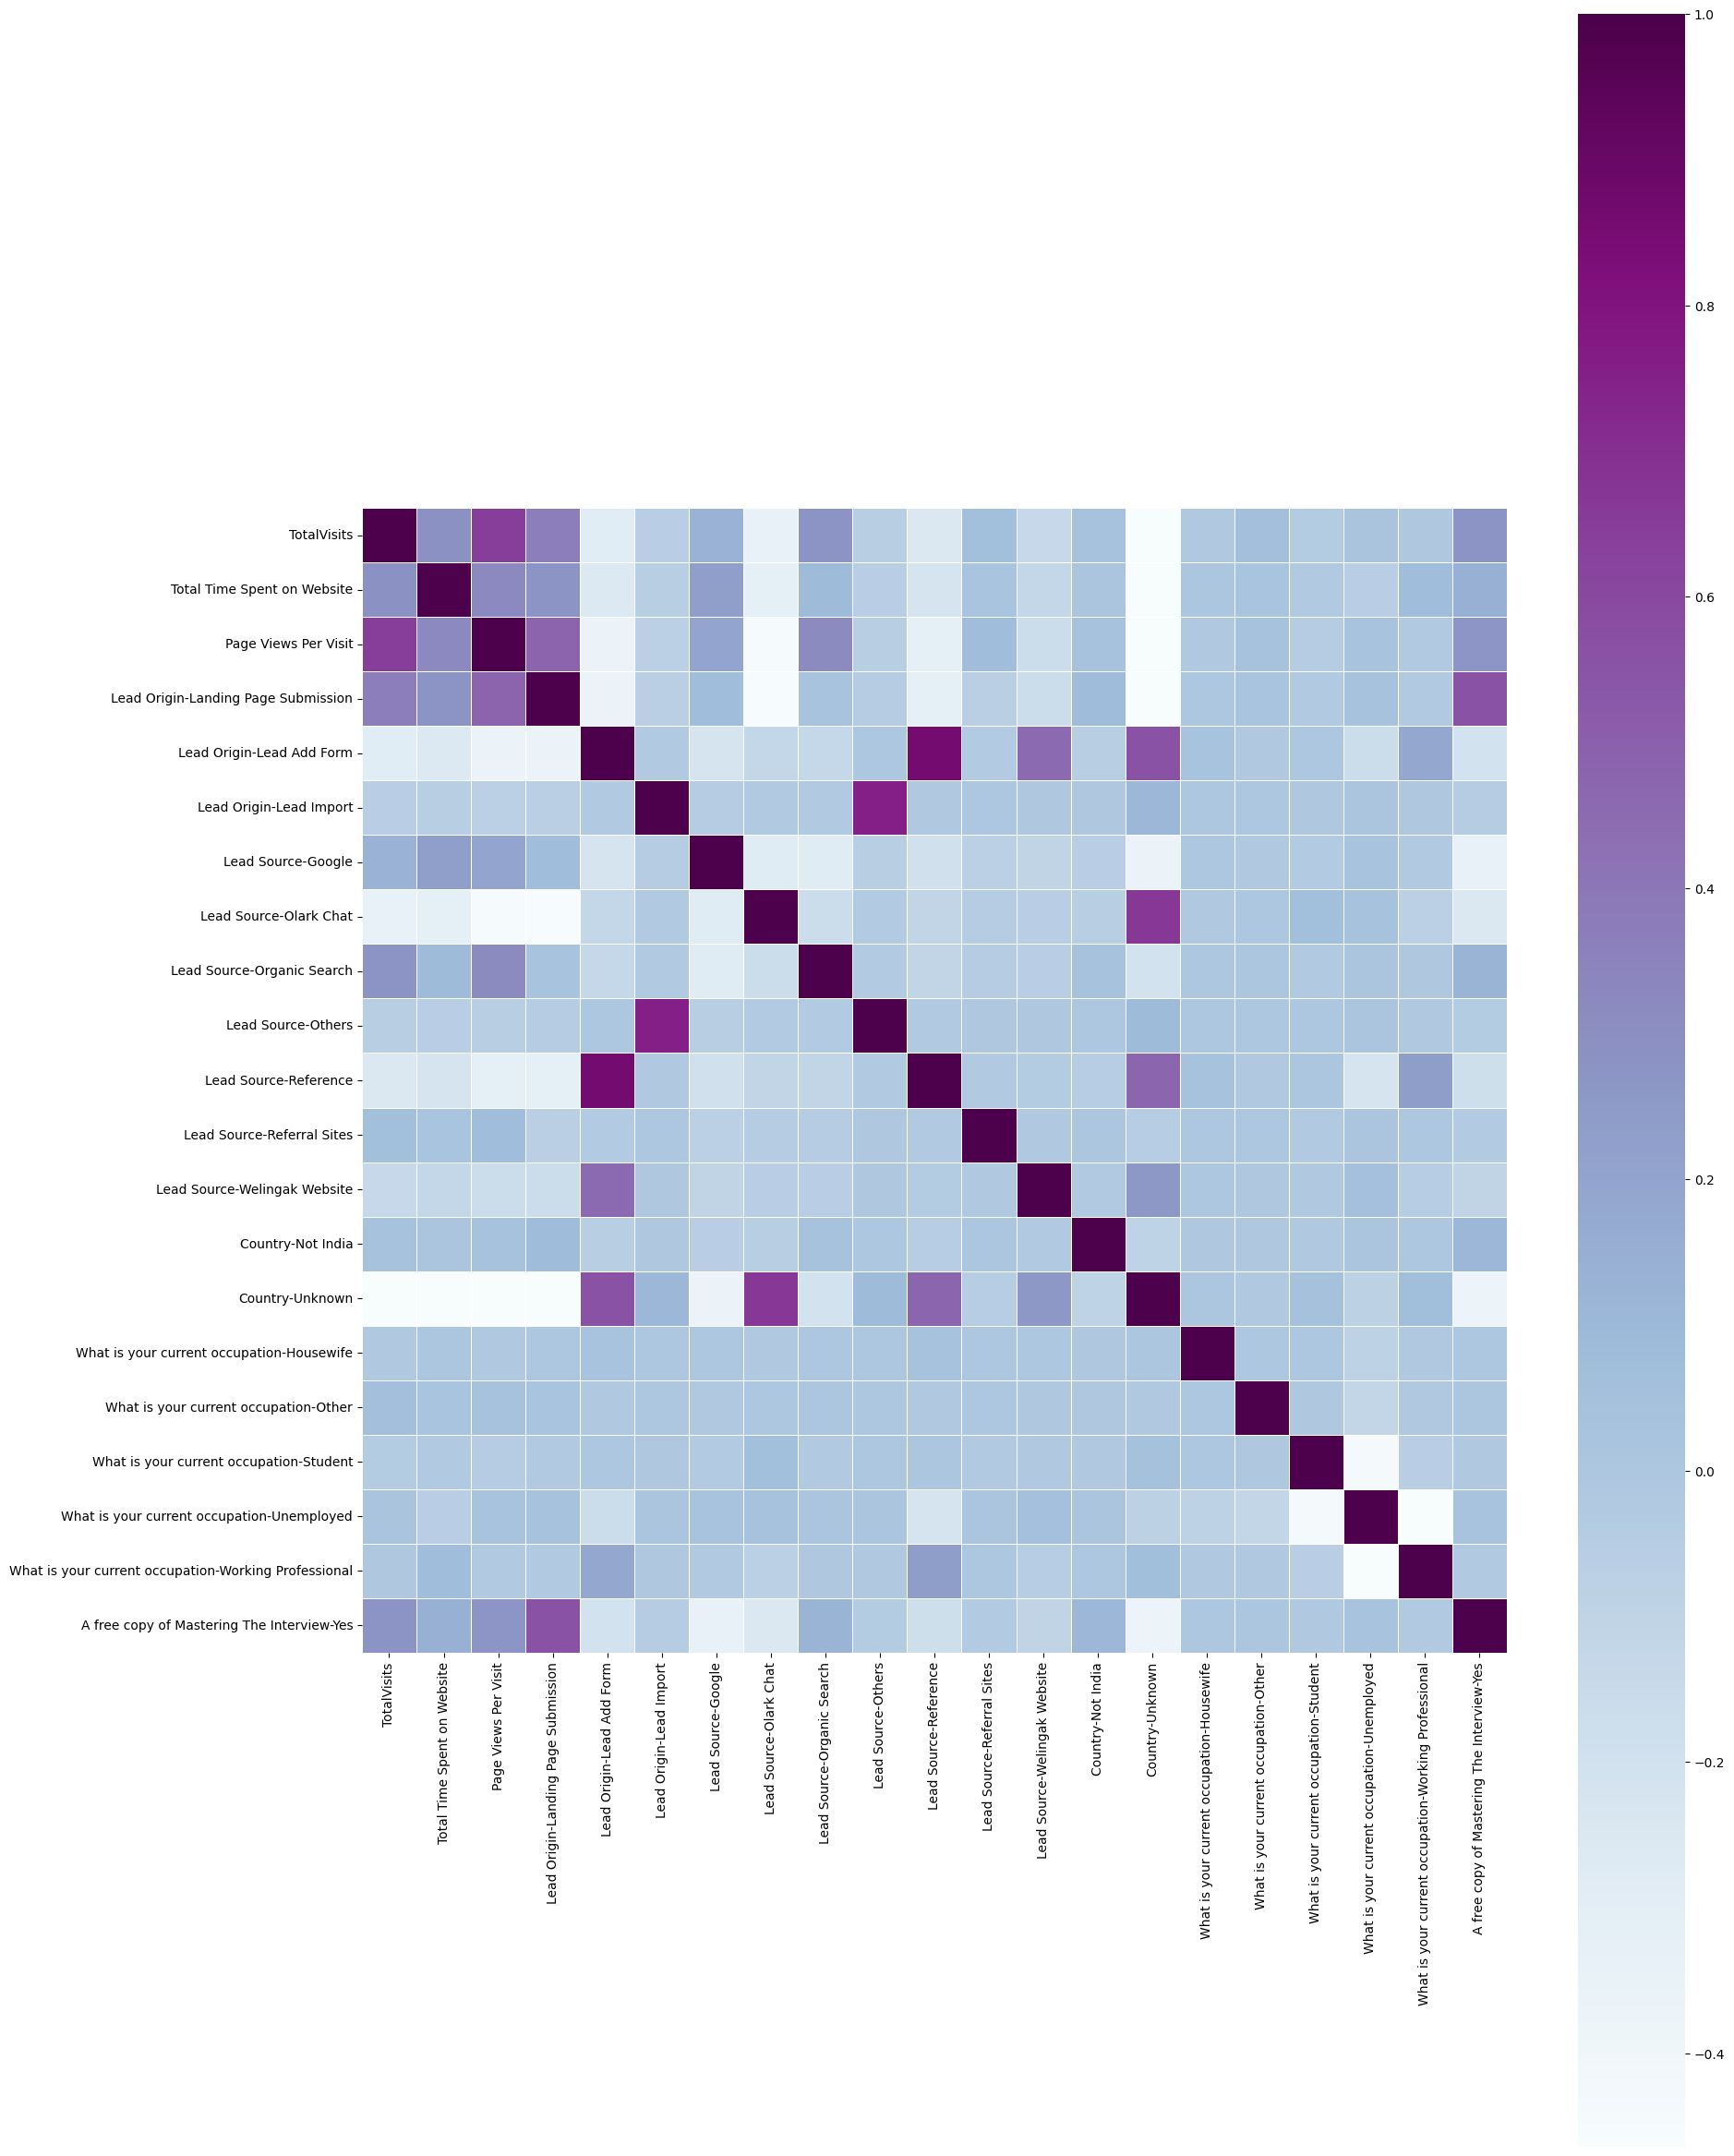

In [68]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(), robust=True, square=True,  linewidths=.5, cmap='BuPu')
plt.show()

### Model Building

In [69]:
#Initalizing Logistic Regression
LogReg = LogisticRegression()

In [70]:
#Finding out best 15 features as per RFE
rfe = RFE(LogReg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
rfe_list = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
rfe_list

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin-Landing Page Submission', False, 5),
 ('Lead Origin-Lead Add Form', True, 1),
 ('Lead Origin-Lead Import', True, 1),
 ('Lead Source-Google', True, 1),
 ('Lead Source-Olark Chat', True, 1),
 ('Lead Source-Organic Search', False, 2),
 ('Lead Source-Others', False, 6),
 ('Lead Source-Reference', True, 1),
 ('Lead Source-Referral Sites', False, 4),
 ('Lead Source-Welingak Website', True, 1),
 ('Country-Not India', True, 1),
 ('Country-Unknown', True, 1),
 ('What is your current occupation-Housewife', True, 1),
 ('What is your current occupation-Other', False, 3),
 ('What is your current occupation-Student', True, 1),
 ('What is your current occupation-Unemployed', True, 1),
 ('What is your current occupation-Working Professional', True, 1),
 ('A free copy of Mastering The Interview-Yes', False, 7)]

In [71]:
#Columns to be included in the model as per RFE
rfe_col = X_train.columns[rfe.support_].to_list()
rfe_col

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin-Lead Add Form',
 'Lead Origin-Lead Import',
 'Lead Source-Google',
 'Lead Source-Olark Chat',
 'Lead Source-Reference',
 'Lead Source-Welingak Website',
 'Country-Not India',
 'Country-Unknown',
 'What is your current occupation-Housewife',
 'What is your current occupation-Student',
 'What is your current occupation-Unemployed',
 'What is your current occupation-Working Professional']

In [72]:
X_train_sm = sm.add_constant(X_train[rfe_col])
X_train_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin-Lead Add Form,Lead Origin-Lead Import,Lead Source-Google,Lead Source-Olark Chat,Lead Source-Reference,Lead Source-Welingak Website,Country-Not India,Country-Unknown,What is your current occupation-Housewife,What is your current occupation-Student,What is your current occupation-Unemployed,What is your current occupation-Working Professional
4170,1.0,0.133333,0.408891,0.266667,0,0,0,0,0,0,0,0,0,0,1,0
6812,1.0,0.533333,0.539613,0.133333,0,0,0,0,0,0,0,0,0,0,1,0
7717,1.0,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0,1,0
207,1.0,0.166667,0.157570,0.333333,0,0,0,0,0,0,1,0,0,0,1,0
2044,1.0,0.066667,0.163292,0.133333,0,0,1,0,0,0,0,0,0,0,1,0


In [73]:
y_train.shape

(4460,)

In [74]:
# Defining Logistic Regression fitting function
def fit_lr(X_training_fit):
    X = X_training_fit
    logisticmodel = sm.GLM(y_train,X_training_fit,family = sm.families.Binomial()).fit()
    return (logisticmodel)

In [75]:
# Defining VIF Function
def vif_lr(X_training_vif):
    vif_df = pd.DataFrame()
    X = X_training_vif
    vif_df['Predictors'] = X.columns
    vif_df['VIF_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df['VIF_value'] = round(vif_df['VIF_value'], 2)
    vif_df = vif_df.sort_values(by = "VIF_value", ascending = False)
    return vif_df

In [76]:
# Defining function to build model
def build_lr(X_training):
    X=X_training
    LR=fit_lr(X)
    print(LR.summary())
    print(vif_lr(X))
    return LR 

In [77]:
LR=build_lr(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2223.5
Date:                Mon, 10 Jul 2023   Deviance:                       4446.9
Time:                        15:46:09   Pearson chi2:                 4.65e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3213
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- Having high p value for column 'What is your current occupation-Housewife'.
- Dropping column 'What is your current occupation-Housewife'

In [78]:
X_train_sm.drop('What is your current occupation-Housewife', axis='columns', inplace=True)

In [79]:
LR = build_lr(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2224.6
Date:                Mon, 10 Jul 2023   Deviance:                       4449.2
Time:                        15:46:09   Pearson chi2:                 4.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3210
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- Dropping column 'Lead Origin-Lead Import'

In [80]:
X_train_sm.drop('Lead Origin-Lead Import', axis='columns', inplace=True)

In [81]:
LR = build_lr(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2225.0
Date:                Mon, 10 Jul 2023   Deviance:                       4450.0
Time:                        15:46:09   Pearson chi2:                 4.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3209
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- Dropping column 'Page Views Per Visit ' due to high p value

In [82]:
X_train_sm.drop('Page Views Per Visit', axis='columns', inplace=True)

In [83]:
LR = build_lr(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2225.8
Date:                Mon, 10 Jul 2023   Deviance:                       4451.6
Time:                        15:46:09   Pearson chi2:                 4.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3206
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- Dropping column 'Lead Origin-Lead Add Form' as its p value is high

In [84]:
X_train_sm.drop('Lead Origin-Lead Add Form', axis='columns', inplace=True)

In [85]:
LR = build_lr(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2227.3
Date:                Mon, 10 Jul 2023   Deviance:                       4454.7
Time:                        15:46:09   Pearson chi2:                 4.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3202
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- Dropping column 'Country-Not India' as its p value value is high

In [86]:
X_train_sm.drop('Country-Not India', axis='columns', inplace=True)

In [87]:
LR = build_lr(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2228.9
Date:                Mon, 10 Jul 2023   Deviance:                       4457.8
Time:                        15:46:09   Pearson chi2:                 4.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3197
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

- We are getting high p value for 'What is your current occupation-Working Professional', hence dropping it.

In [88]:
X_train_sm.drop('What is your current occupation-Working Professional', axis='columns', inplace=True)

In [89]:
LR = build_lr(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2230.2
Date:                Mon, 10 Jul 2023   Deviance:                       4460.3
Time:                        15:46:09   Pearson chi2:                 4.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3193
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

- We are getting high VIF value for 'Country-Unknown', hence dropping it.

In [90]:
X_train_sm.drop('Country-Unknown', axis='columns', inplace=True)

In [91]:
LR = build_lr(X_train_sm)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4451
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2237.1
Date:                Mon, 10 Jul 2023   Deviance:                       4474.3
Time:                        15:46:09   Pearson chi2:                 4.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3172
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

- From above p values and VIFs , this model seems good.

### Predictions

In [92]:
# Predicting target variables as per the final model
y_train_pred = LR.predict(X_train_sm)
y_train_pred.head()

4170    0.456840
6812    0.746547
7717    0.364980
207     0.223253
2044    0.268900
dtype: float64

In [93]:
y_train.shape

(4460,)

In [94]:
y_train_df = pd.DataFrame({'Converted':y_train.values, 'Predicted_Prob':y_train_pred.values})

In [95]:
y_train_df.head()

,Converted,Predicted_Prob
0,1,0.456840
1,1,0.746547
2,1,0.364980
3,0,0.223253
4,0,0.268900


In [96]:
y_train_df['Predicted']=y_train_df['Predicted_Prob'].map(lambda x: 1 if x>=0.5 else 0)

In [97]:
y_train_df.head()

,Converted,Predicted_Prob,Predicted
0,1,0.456840,0
1,1,0.746547,1
2,1,0.364980,0
3,0,0.223253,0
4,0,0.268900,0


### Evaluation of Model

In [98]:
confusion_matrix = metrics.confusion_matrix(y_train_df['Converted'],y_train_df['Predicted'])
print(confusion_matrix)

[[1917  402]
 [ 672 1469]]


In [99]:
# Accuracy
accuracy = metrics.accuracy_score(y_train_df['Converted'],y_train_df['Predicted'])
accuracy

0.7591928251121076

- Acccuracy Score of Model is approx 76% 

In [100]:
TruePositive=confusion_matrix[1,1]
TrueNegative=confusion_matrix[0,0]
FalsePositive=confusion_matrix[0,1]
FalseNegative=confusion_matrix[1,0]

In [101]:
#Sensitivity
sensitivity = TruePositive/(TruePositive+FalseNegative)
sensitivity

0.6861279775805699

- Sensitivity Score of Model is approx 68%

In [102]:
#Specificity
specificity = TrueNegative/(TrueNegative+FalsePositive)
specificity

0.8266494178525227

- Specificity Score of Model is approx 83%

In [103]:
#Precision
precision=metrics.precision_score(y_train_df['Converted'],y_train_df['Predicted'])
precision

0.7851416354890433

- Precision Score of the model is approx 79%

In [104]:
#Recall
recall=metrics.recall_score(y_train_df['Converted'],y_train_df['Predicted'])
recall

0.6861279775805699

- Recall Score of the model is approx 69%

**By above metrics score, model seems to be good.**

### ROC Curve - Optimizing Cut off

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_df['Converted'],y_train_df['Predicted'], drop_intermediate = False )

In [106]:
#Function for plotting ROC curve
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

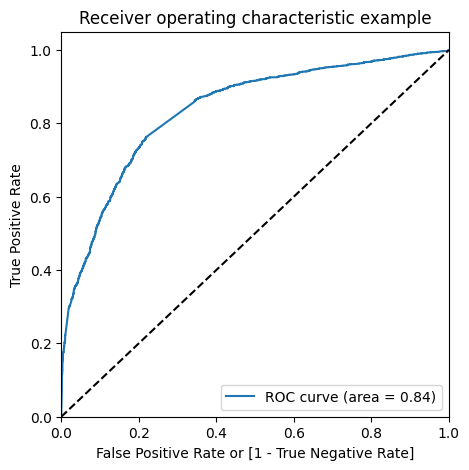

In [107]:
#Calling ROC function
draw_roc(y_train_df['Converted'],y_train_df['Predicted_Prob'])

- The area under curve for the ROC curve is 0.84.

In [108]:
#Creatring columns with different probabilities
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_df[i]= y_train_df['Predicted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_df.head()

,Converted,Predicted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.456840,0,1,1,1,1,1,0,0,0,0,0
1,1,0.746547,1,1,1,1,1,1,1,1,1,0,0
2,1,0.364980,0,1,1,1,1,0,0,0,0,0,0
3,0,0.223253,0,1,1,1,0,0,0,0,0,0,0
4,0,0.268900,0,1,1,1,0,0,0,0,0,0,0


In [109]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity','precision','recall'])
for i in numbers:
    confusion_matrix = metrics.confusion_matrix(y_train_df['Converted'],y_train_df[i] )
    total1=sum(sum(confusion_matrix))
    accuracy = (confusion_matrix[0,0]+confusion_matrix[1,1])/total1
    
    specificity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
    sensitivity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
    
    precision = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
    recall = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity,precision,recall]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity  precision    recall
0.0   0.0  0.480045     1.000000     0.000000   0.480045  1.000000
0.1   0.1  0.481614     0.997198     0.005606   0.480748  0.997198
0.2   0.2  0.646861     0.941149     0.375162   0.581697  0.941149
0.3   0.3  0.739238     0.885100     0.604571   0.673898  0.885100
0.4   0.4  0.771300     0.749183     0.791721   0.768567  0.749183
0.5   0.5  0.759193     0.686128     0.826649   0.785142  0.686128
0.6   0.6  0.742601     0.608127     0.866753   0.808194  0.608127
0.7   0.7  0.713901     0.499299     0.912031   0.839749  0.499299
0.8   0.8  0.678700     0.380196     0.954291   0.884783  0.380196
0.9   0.9  0.617040     0.212985     0.990082   0.951983  0.212985


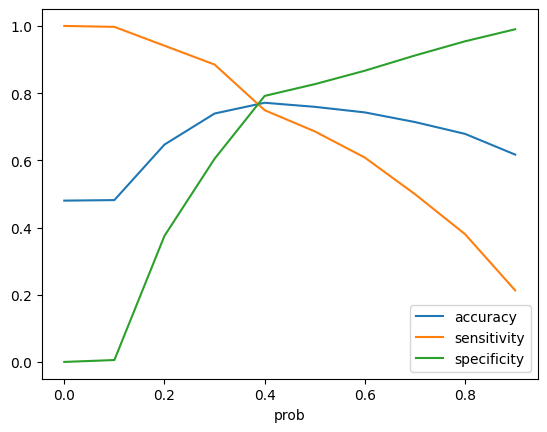

In [110]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

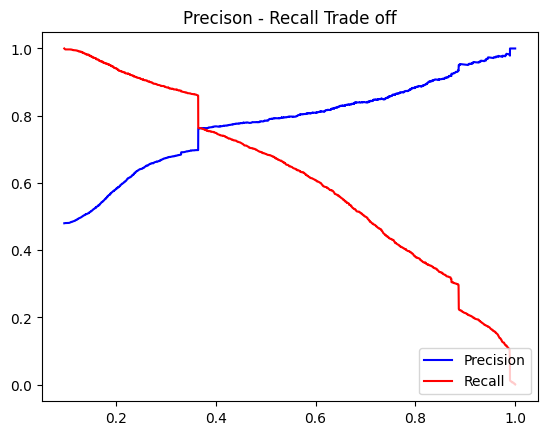

In [111]:
p, r, thresholds = precision_recall_curve(y_train_df['Converted'], y_train_df['Predicted_Prob'])
plt.plot(thresholds, p[:-1], "b-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.title("Precison - Recall Trade off")
plt.legend(loc="lower right")
plt.show()

- From the above plots, it seems best cut off lies between 0.35 to 0.4.
- Hence choosing 0.37 as final cut off

In [112]:
y_train_df['final'] = y_train_df['Predicted_Prob'].map( lambda x: 1 if x > 0.37 else 0)
y_train_df.head()

,Converted,Predicted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final
0,1,0.456840,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.746547,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.364980,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.223253,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.268900,0,1,1,1,0,0,0,0,0,0,0,0


In [113]:
# Creating confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_df['Converted'],y_train_df['final'])
confusion_matrix

array([[1811,  508],
       [ 508, 1633]], dtype=int64)

In [114]:
# Accuracy
accuracy = metrics.accuracy_score(y_train_df['Converted'],y_train_df['final'])
accuracy

0.7721973094170403

- Acccuracy Score of Model is approx 77% which can be termed as good accuracy. 

In [115]:
TruePositive=confusion_matrix[1,1]
TrueNegative=confusion_matrix[0,0]
FalsePositive=confusion_matrix[0,1]
FalseNegative=confusion_matrix[1,0]

In [116]:
#Sensitivity
sensitivity = TruePositive/(TruePositive+FalseNegative)
sensitivity

0.7627276973376926

- Sensitivity Score of Model is approx 76%

In [117]:
#Specificity
specificity = TrueNegative/(TrueNegative+FalsePositive)
specificity

0.7809400603708495

- Specificity Score of Model is approx 78%

In [118]:
#Precision
precision=metrics.precision_score(y_train_df['Converted'],y_train_df['final'])
precision

0.7627276973376926

- Precision Score of the model is approx 76%

In [119]:
#Recall
recall=metrics.recall_score(y_train_df['Converted'],y_train_df['final'])
recall

0.7627276973376926

- Recall Score of the model is approx 76%

**With the above metric scores, model seems good with cut off of 0.37**

### Evaluating model on Test Data

In [120]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,1912.000000,1912.000000,1912.000000
mean,3.465481,538.555962,2.461454
std,3.470570,569.578862,2.046326
min,0.000000,0.000000,0.000000
25%,2.000000,36.750000,1.000000
50%,3.000000,287.500000,2.000000
75%,5.000000,1020.000000,3.000000
max,30.000000,2253.000000,15.000000


In [121]:
#Scaling
#We have already trained the scalar parameter, hence for test data we will just transform it.
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = minmaxscaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [122]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,1912.000000,1912.000000,1912.000000
mean,0.115516,0.237040,0.164097
std,0.115686,0.250695,0.136422
min,0.000000,0.000000,0.000000
25%,0.066667,0.016175,0.066667
50%,0.100000,0.126540,0.133333
75%,0.166667,0.448944,0.200000
max,1.000000,0.991637,1.000000


In [123]:
#Fetching columns from final model
final_columns = X_train_sm.columns.to_list()
final_columns.remove('const')
final_columns

['TotalVisits',
 'Total Time Spent on Website',
 'Lead Source-Google',
 'Lead Source-Olark Chat',
 'Lead Source-Reference',
 'Lead Source-Welingak Website',
 'What is your current occupation-Student',
 'What is your current occupation-Unemployed']

In [124]:
X_test_sm = sm.add_constant(X_test[final_columns])
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Source-Google,Lead Source-Olark Chat,Lead Source-Reference,Lead Source-Welingak Website,What is your current occupation-Student,What is your current occupation-Unemployed
8402,1.0,0.066667,0.621479,1,0,0,0,0,1
8782,1.0,0.166667,0.246039,0,0,0,0,0,1
6199,1.0,0.100000,0.414613,0,0,0,0,0,1
6482,1.0,0.000000,0.000000,0,1,0,0,0,1
6026,1.0,0.000000,0.000000,0,0,1,0,0,1


In [125]:
#Predicting on test data using final model we have
y_test_df=pd.DataFrame()
y_test_df['Converted']=y_test
y_test_df['Predicted_prob']=LR.predict(X_test_sm)
y_test_df['Predicted']=y_test_df['Predicted_prob'].map(lambda x: 1 if x>0.37 else 0)
y_test_df.head()

,Converted,Predicted_prob,Predicted
8402,1,0.742407,1
8782,0,0.299580,0
6199,1,0.449458,1
6482,1,0.364980,0
6026,1,0.886413,1


In [126]:
# Creating confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_df['Converted'],y_test_df['Predicted'])
confusion_matrix

array([[780, 208],
       [220, 704]], dtype=int64)

In [127]:
# Accuracy
accuracy = metrics.accuracy_score(y_test_df['Converted'],y_test_df['Predicted'])
accuracy

0.7761506276150628

- Acccuracy Score of Model is approx 77% which can be termed as good accuracy. 

In [128]:
TruePositive=confusion_matrix[1,1]
TrueNegative=confusion_matrix[0,0]
FalsePositive=confusion_matrix[0,1]
FalseNegative=confusion_matrix[1,0]

In [129]:
#Sensitivity
sensitivity = TruePositive/(TruePositive+FalseNegative)
sensitivity

0.7619047619047619

- Sensitivity Score of Model is approx 76%

In [130]:
#Specificity
specificity = TrueNegative/(TrueNegative+FalsePositive)
specificity

0.7894736842105263

- Specificity Score of Model is approx 79%

In [131]:
#Precision
precision=metrics.precision_score(y_test_df['Converted'],y_test_df['Predicted'])
precision

0.7719298245614035

- Precision Score of the model is approx 77%

In [132]:
#Recall
recall=metrics.recall_score(y_test_df['Converted'],y_test_df['Predicted'])
recall

0.7619047619047619

- Recall Score of the model is approx 76%

**With the above metric scores, model seems good**

### Model Score on training data set
- **Confusion Matrix**
            [1811  508]
            [508  1633]
    - True Positive: 1633
    - True Negative: 1811
    - False Positive: 508
    - False Negative: 508
    
    
- **Accuracy**: 77%
- **Sensitivity**: 76%
- **Specificity**: 78%
- **Precision**: 76%
- **Recall**: 76%

### Model Score on test data set
- **Confusion Matrix**
            [780 208]
            [220 704]
    - True Positive: 704
    - True Negative: 780
    - False Positive: 208
    - False Negative: 220
    
    
- **Accuracy**: 77%
- **Sensitivity**: 76%
- **Specificity**: 79%
- **Precision**: 77%
- **Recall**: 76%

### Features of the model with their coefficients

In [133]:
LR.params.sort_values(ascending=False)

Lead Source-Welingak Website                  6.698274
Total Time Spent on Website                   4.493207
Lead Source-Reference                         4.286916
Lead Source-Olark Chat                        1.678488
TotalVisits                                   1.664985
Lead Source-Google                            0.387387
const                                         0.240806
What is your current occupation-Unemployed   -2.473107
What is your current occupation-Student      -2.624084
dtype: float64

### Score calculations for the data set (train and test data set)

In [134]:
leads_score_df = leads_final[final_columns]

In [135]:
leads_score_df['Actual-Converted']=leads_final['Converted']

In [136]:
score_df = pd.DataFrame(y_train_pred)
score_df = pd.concat([score_df,y_test_df['Predicted_prob']],axis=0)

In [137]:
leads_score_df['Score']=score_df*100

In [138]:
leads_score_df['Predicted-Converted']=leads_score_df['Score'].map(lambda x : 1 if x > 37 else 0)

In [139]:
leads_score_df.head()

,TotalVisits,Total Time Spent on Website,Lead Source-Google,Lead Source-Olark Chat,Lead Source-Reference,Lead Source-Welingak Website,What is your current occupation-Student,What is your current occupation-Unemployed,Actual-Converted,Score,Predicted-Converted
0,0.0,0,0,1,0,0,0,1,0,36.498027,0
1,5.0,674,0,0,0,0,0,1,0,34.935595,0
2,2.0,1532,0,0,0,0,1,0,1,68.080443,1
3,1.0,305,0,0,0,0,0,1,0,17.170094,0
4,2.0,1428,1,0,0,0,0,1,1,74.841194,1


### Conclusion/Suggestion for X company
X company can focus on those leads which are mentioned:
- Leads having high number of visits and spending much time on website
- Leads having Source as Welingak Website, Reference, Olark chat and Google

Also X company should avoid leads which are having current occupation as Unemployed or Student.